In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df_train= pd.read_csv('mnist_train.csv')
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
"""X = df_train.iloc[:,0:].values
Y = df_train.iloc[:,0].values"""

print(df_train.shape)
data_train = np.array(df_train)
m, n = data_train.shape
np.random.shuffle(data_train)

data_train = data_train[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



(55763, 785)


In [26]:
X_train[:,0].shape, Y_train.shape

((784,), (54763,))

In [27]:
X_train.shape

(784, 54763)

In [28]:
def reLU(Z):
    return np.maximum(0,Z)

def derivative_reLU(Z): 
    return Z>0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

    

def init_params():
    W1 = np.random.randn(10 ,784)
    b1 = np.random.randn(10,1)
    W2 = np.random.rand(10,10 )
    b2 = np.random.rand(10,1)
    return W1, b1, W2, b2


def forprop(W1, b1, W2, b2, X):
     Z1 = W1.dot(X) + b1
     A1 =  reLU(Z1)
     Z2 = W2.dot(A1) + b2
     A2 = softmax(Z2)
     return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backprop(Z1, Z2, A1, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_reLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T) 
    db1 = 1/m * np.sum(dZ1)
    return dW1,db1, dW2, db2
    
def params_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



    

In [29]:
def pred(A2):
    return np.argmax(A2, axis=0)
def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1,b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forprop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2= backprop(Z1, Z2, A1, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = params_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%100 == 0:
            print(f'Iteration {i}')
            predictions = pred(A2)
            print(accuracy(predictions, Y))
    return W1, b1, W2, b2



In [30]:
gradient_descent(X_train, Y_train, 205, 0.2)

Iteration 0
[4 4 4 ... 5 9 5] [5 1 0 ... 7 5 7]
0.10689699249493272
Iteration 100
[8 1 0 ... 7 5 7] [5 1 0 ... 7 5 7]
0.46104121395832953
Iteration 200
[8 1 0 ... 7 5 7] [5 1 0 ... 7 5 7]
0.5447473659222468


(array([[ 0.51873114,  1.30855417,  0.34176709, ..., -0.80565937,
         -0.73769599, -1.32896695],
        [ 1.59131083,  1.63582745, -1.12875347, ...,  0.69401196,
          0.0949526 ,  0.09007307],
        [ 0.25475511,  0.04097864,  1.18765065, ...,  0.1058458 ,
         -0.20588166, -0.52728365],
        ...,
        [-2.09285516,  0.94022954, -0.53350868, ...,  1.324432  ,
          0.43166687,  1.08759668],
        [-1.61166272, -0.84961711,  0.39240375, ...,  0.1072631 ,
          1.5293249 , -0.8055061 ],
        [-1.0906478 , -1.13479389, -0.45034456, ...,  0.06634573,
          0.54805783,  0.10878729]]),
 array([[ 0.65143282],
        [-1.67379189],
        [-0.01487755],
        [-2.09587121],
        [ 1.82105163],
        [-0.83717734],
        [-1.37900001],
        [-2.14524572],
        [-0.69270312],
        [-0.86036374]]),
 array([[ 0.3935704 ,  0.79168242,  0.45607749,  0.41760378,  0.53157784,
          0.27699907,  0.69132789,  0.23832274, -0.4016438 ,  0.747

In [31]:
def make_predictions(X,W1,b1, W2, b2):
     _ ,_, _, A2 = forprop(W1, b1, W2, b2, X)
     predictions = pred(A2)
     return predictions
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

In [32]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.5)

Iteration 0
[3 2 6 ... 6 3 1] [5 1 0 ... 7 5 7]
0.059419681171593956
Iteration 100
[0 1 0 ... 7 5 7] [5 1 0 ... 7 5 7]
0.5085002647773131
Iteration 200
[0 1 0 ... 7 5 7] [5 1 0 ... 7 5 7]
0.6019940470755802
Iteration 300
[0 1 0 ... 7 5 7] [5 1 0 ... 7 5 7]
0.6481566020853496
Iteration 400
[0 1 0 ... 7 5 7] [5 1 0 ... 7 5 7]
0.6728265434691306


Prediction:  [4]
Label:  4


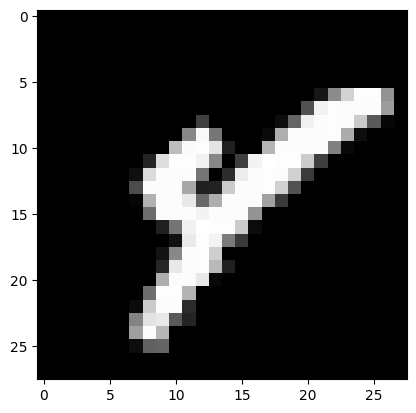

In [33]:
test_prediction(4, W1, b1, W2, b2)

Prediction:  [7]
Label:  7


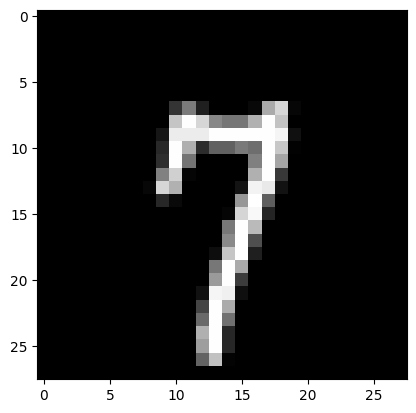

In [34]:
test_prediction(18, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


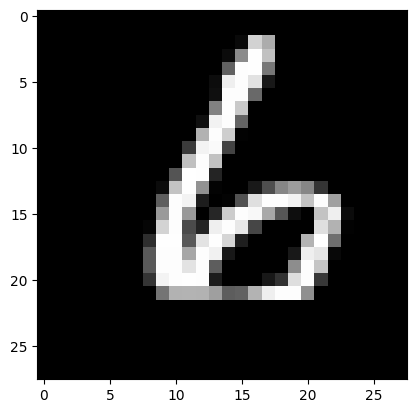

In [35]:
test_prediction(200, W1, b1, W2, b2)

Prediction:  [2]
Label:  3


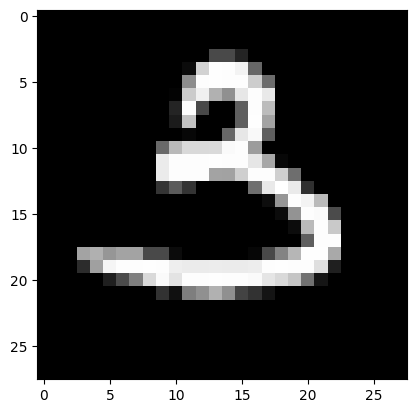

In [36]:
test_prediction(940, W1, b1, W2, b2)

In [37]:
df_test = pd.read_csv('mnist_test.csv')
p,k = df_test.shape

In [38]:
data_test = np.array(df_test).T
Y_test = data_test[0]
X_test = data_test[1:k]

def make_predictions_test(X,W1,b1, W2, b2):
     _ ,_, _, A2 = forprop(W1, b1, W2, b2, X)
     predictions = pred(A2)
     return predictions
def test_prediction_test(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    


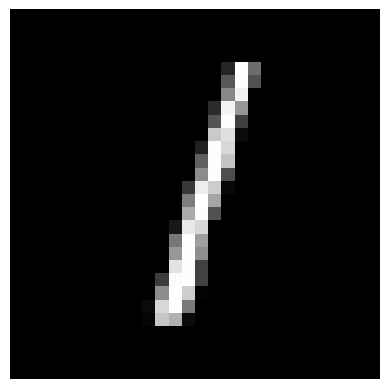

In [39]:
current_image = X_test[:, 2]
current_image = current_image.reshape(28, 28)
plt.imshow(current_image, cmap="gray")
plt.axis("off")
plt.show()



Prediction:  [0]
Label:  0


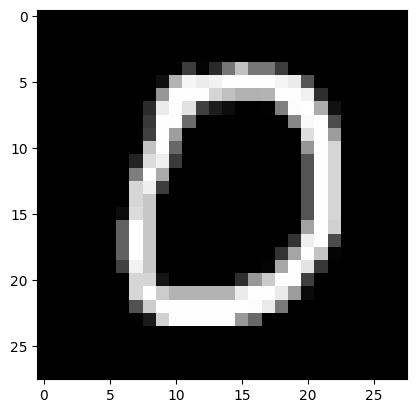

In [40]:
test_prediction_test(10, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


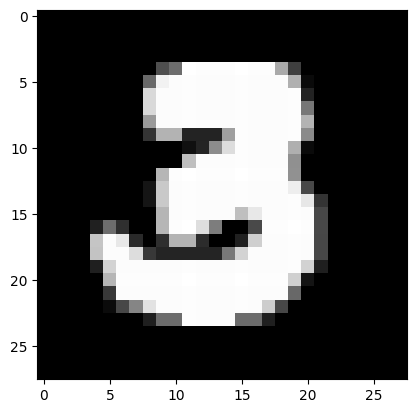

In [41]:
test_prediction_test(200,W1, b1, W2, b2)

Prediction:  [7]
Label:  9


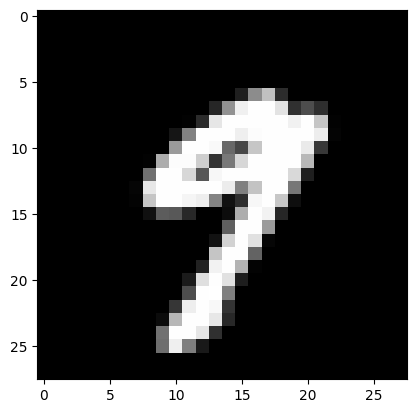

In [42]:
test_prediction_test(20,W1, b1, W2, b2)

Second Part

In [47]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io
import numpy as np
import cv2
import torchvision
import torchvision.transforms as transforms


In [53]:
dataset = MNIST(root='./data', train= True, download=True, transform= transforms.ToTensor())
mnist_train, mnist_val = random_split(dataset, [55000,5000])

train_loader = DataLoader(mnist_train, batch_size = 128,drop_last = True, shuffle = True)
val_loader = DataLoader(mnist_val, batch_size = 128, drop_last= False, shuffle = True)


model = nn.Sequential(nn.Flatten(),
                            nn.Linear(784,128), 
                            nn.ReLU(),
                            nn.Linear(128,10)                             
)

loss = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#Training
model.train()
n_epochs = 10
for epoch in range(n_epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        output = model(xb)
        l = loss(output, yb)
        l.backward()
        optimizer.step()

#Validation
model.eval()
total_correct = 0
total_samples = 0
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        output = model(xb)
        pred = output.argmax(dim=1)  
        total_correct += (pred == yb).sum().item()
        total_samples += yb.size(0)
    val_acc = total_correct / total_samples
    print(f"Epoch {epoch+1}/{n_epochs}: val_acc = {val_acc:.4f}")


Epoch 10/10: val_acc = 0.9652
